This jupyter notebook is for testing painting GREAT array profiles onto the sky

In [ ]:
#Import library
import sens_map_lib
import numpy as np
from astropy.modeling import models
from matplotlib import pyplot

block x before rotation : [[-108.9  108.9]
 [-108.9  108.9]]
block y before rotation : [[-36.3 -36.3]
 [ 36.3  36.3]]
x =  0.0
y =  0.0
block angle =  0.0
cos_block_angle =  1.0
sin_block_angle =  0.0
(cos_block_angle*block_x + sin_block_angle*block_y) =  [[-108.9  108.9]
 [-108.9  108.9]]
(-sin_block_angle*block_x + cos_block_angle*block_y) =  [[-36.3 -36.3]
 [ 36.3  36.3]]
block x after rotation : [[-108.9  108.9]
 [-108.9  108.9]]
block y after rotation : [[-36.3 -36.3]
 [ 36.3  36.3]]
MAP X =  -108.89999999999999
MAP Y =  -36.3
MEAN MAP X -108.9
MEAN MAP Y -36.3
MAP X =  -108.89999999999999
MAP Y =  36.3
MEAN MAP X -108.9
MEAN MAP Y 36.3
MAP X =  108.89999999999999
MAP Y =  -36.3
MEAN MAP X 108.89999999999999
MEAN MAP Y -36.3
MAP X =  108.89999999999999
MAP Y =  36.3
MEAN MAP X 108.89999999999999
MEAN MAP Y 36.3
S/N before convolution:  5.4106421738173715e-06
9098.67934471258 674303685.6976587
S/N after convolution:  1.3493444478653208e-05
9098.67934471258 674303685.6976587
S/N =  

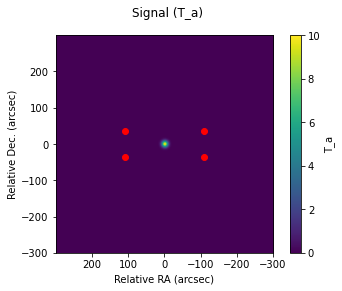

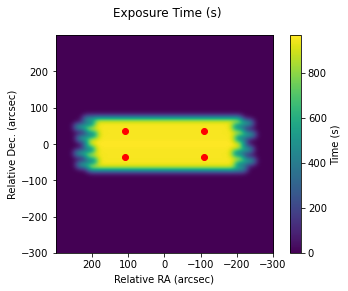

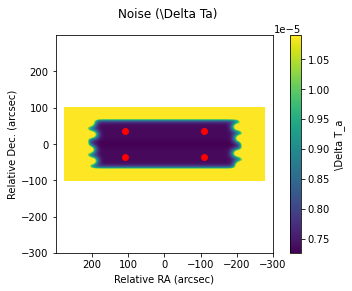

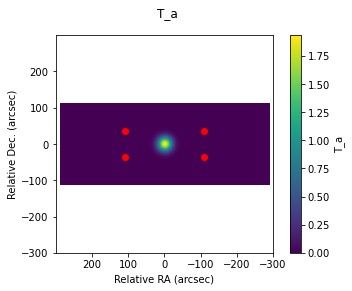

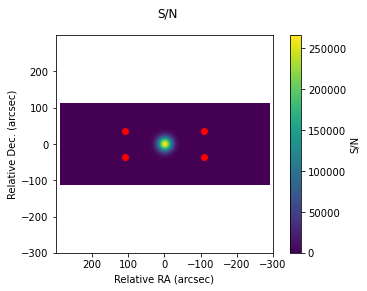

In [6]:
#Test Array OTF Mapping with a multiple blocks

sky_grid = sens_map_lib.sky([-300,300], [-300,300], 0.5) #Generate sky object


#ring = models.Ring2D(amplitude=1.0, x_0=0., y_0=0., r_in=0.0, r_out=50.0)
#sky_grid.input(ring) #Add in artifical ring signal

#Set parameters for 2D gaussian
x = 0.
y = 0.
amplitude = 10.0
fwhm = 10.0
stddev = fwhm / (2.0 * np.sqrt(np.log(2.0)))#Convert FWHM to stddev
point_source_gaussian = models.Gaussian2D(amplitude=amplitude, x_mean=x, y_mean=y, x_stddev=stddev, y_stddev=stddev)
sky_grid.input(point_source_gaussian)


lfa_array = sens_map_lib.LFAV_array()
lfa_array.array_otf(sky_grid, nblock_scan=2, nblock_perp=2, x=0.0, y=0., step=3.63/2, length=3.0, time=2.0, cycles=5, map_angle=0., direction='x', nscans=4)


#Simulate the observations
sky_grid.simulate_observation(Tsys=2480.0)

#Print S/N
print('S/N = ', sky_grid.s2n())

#Show results
pyplot.figure()
sky_grid.plot('signal')
pyplot.figure()
sky_grid.plot('exposure')
pyplot.figure()
sky_grid.plot('noise')
pyplot.figure()
sky_grid.plot('data')
pyplot.figure()
sky_grid.plot('s2n')

print('Block x centers: ', sky_grid.x_points)
print('Block y centers: ', sky_grid.y_points)


In [ ]:
#Generate sky object
sky_grid = sens_map_lib.sky([-50,50], [-50,50], 0.2)

#Plot empty sky grid
sky_grid.plot('data')

In [ ]:
#Create a point source to model the "true" signal on the sky
#This source will be a 2D gaussian gererated from an astropy.modeling object

#Set parameters for 2D gaussian
x = 0.
y = 0.
amplitude = 10.0
fwhm = 1.0
stddev = fwhm / (2.0 * np.sqrt(np.log(2.0)))#Convert FWHM to stddev

#Create 2D gaussian object and import it into the "the" signal omn the sky
point_source_gaussian = models.Gaussian2D(amplitude=amplitude, x_mean=x, y_mean=y, x_stddev=stddev, y_stddev=stddev)
sky_grid.input(point_source_gaussian)

#Plot the "true" signal on the sky
sky_grid.plot('signal')

In [ ]:
#Generate an LFA array object
lfa_array = sens_map_lib.LFAV_array()

In [ ]:
#Simulate a single point observation for the point source

#Clear sky object
sky_grid.clear()

#Test a single pointing being painted onto the sky
lfa_array.single_point(sky_grid, x=0., y=0., array_angle=0.0, time=60.0, cycles=5.0)

#simulate observagtion
sky_grid.simulate_observation(Tsys=2480.0)

#Show results
pyplot.figure()
sky_grid.plot('signal')
pyplot.figure()
sky_grid.plot('exposure')
pyplot.figure()
sky_grid.plot('noise')
pyplot.figure()
sky_grid.plot('data')
pyplot.figure()
sky_grid.plot('s2n')

In [ ]:
#Simulate a honeycomb map observation for the point source

#Clear sky object
#sky_grid.clear()
sky_grid = sens_map_lib.sky([-200,200], [-200,200], 0.2)


#Test a single pointing being painted onto the sky
lfa_array.honeycomb(sky_grid, x=0., y=0., array_angle=0.0, time=30.0, cycles=10.0)
lfa_array.honeycomb(sky_grid, x=0., y=100, array_angle=0.0, time=30.0, cycles=10.0)


#Set parameters for 2D gaussian
x = 0.
y = 0.
amplitude = 10.0
fwhm = 1.0
stddev = fwhm / (2.0 * np.sqrt(np.log(2.0)))#Convert FWHM to stddev

#Create 2D gaussian object and import it into the "the" signal omn the sky
point_source_gaussian = models.Gaussian2D(amplitude=amplitude, x_mean=x, y_mean=y, x_stddev=stddev, y_stddev=stddev)
sky_grid.input(point_source_gaussian)

#Simulate the observations
sky_grid.simulate_observation(Tsys=2480.0)

#Show results
pyplot.figure()
sky_grid.plot('signal')
pyplot.figure()
sky_grid.plot('exposure')
pyplot.figure()
sky_grid.plot('noise')
pyplot.figure()
sky_grid.plot('data')
pyplot.figure()
sky_grid.plot('s2n')

In [ ]:
#Now we will test using a ring as our "science target"


#Generate sky object
sky_grid = sens_map_lib.sky([-200,200], [-200,200], 0.2)

#Plot empty sky grid
pyplot.figure()
sky_grid.plot()

#Create "ring" and input into sky_grid
ring = models.Ring2D(amplitude=1.0, x_0=0., y_0=0., r_in=40.0, r_out=75.0)
sky_grid.input(ring)

#Plot the ring
pyplot.figure()
sky_grid.plot('signal')

In [ ]:
#Test raster mapping the ring and plotting the result

#Clear sky
sky_grid.clear()

#Set parameters for 2D gaussian
x = 0.
y = 0.
amplitude = 10.0
fwhm = 1.0
stddev = fwhm / (2.0 * np.sqrt(np.log(2.0)))#Convert FWHM to stddev

#Create 2D gaussian object and import it into the "the" signal omn the sky
point_source_gaussian = models.Gaussian2D(amplitude=amplitude, x_mean=x, y_mean=y, x_stddev=stddev, y_stddev=stddev)
sky_grid.input(point_source_gaussian)

#Test a raster map on the sky
lfa_array.map(sky_grid, x=0.0, y=0.0, array_angle=0.0, map_angle=20.0, nx=30, ny=30,
                    dx=8.0, dy=8.0, time=10.0, cycles=1)


#Simulate the observations
sky_grid.simulate_observation(Tsys=2480.0)

#Print S/N
print('S/N = ', sky_grid.s2n())

#Show results
pyplot.figure()
sky_grid.plot('signal')
pyplot.figure()
sky_grid.plot('exposure')
pyplot.figure()
sky_grid.plot('noise')
pyplot.figure()
sky_grid.plot('data')
pyplot.figure()
sky_grid.plot('s2n')

In [ ]:
#Test downsampling by a factor of 4
sky_grid.downsample(4)

#Print S/N
print('S/N = ', sky_grid.s2n())

#Show results
pyplot.figure()
sky_grid.plot('signal')
pyplot.figure()
sky_grid.plot('exposure')
pyplot.figure()
sky_grid.plot('noise')
pyplot.figure()
sky_grid.plot('data')
pyplot.figure()
sky_grid.plot('s2n')

In [ ]:
#Test reading in a .aor file and using it to map the ring

sky_grid = sens_map_lib.sky([-100,100], [-100,100], 0.2) #Generate sky object
ring = models.Ring2D(amplitude=1.0, x_0=0., y_0=0., r_in=0.0, r_out=50.0)
sky_grid.input(ring) #Add in artifical ring signal
aors = sens_map_lib.open_aors('test2.aor') #Read in .aor file the result is a list of aor objects
#for aor in aors: #Paint all aors in .aor file onto the exposure map for the sky_grid object, here we assume the LFAH array is used
#    aor.paint(sky_grid, 'LFAH') 
aors[2].paint(sky_grid, '4G4') 
sky_grid.simulate_observation(Tsys=1100.0)#Simulate the observations


#Show results
pyplot.figure()
sky_grid.plot('signal')
pyplot.figure()
sky_grid.plot('exposure')
pyplot.figure()
sky_grid.plot('noise')
pyplot.figure()
sky_grid.plot('data')
pyplot.figure()
sky_grid.plot('s2n')

In [ ]:
#Test Array OTF Mapping with a single block

sky_grid = sens_map_lib.sky([-150,150], [-150,150], 0.2) #Generate sky object


#ring = models.Ring2D(amplitude=1.0, x_0=0., y_0=0., r_in=0.0, r_out=50.0)
#sky_grid.input(ring) #Add in artifical ring signal

#Set parameters for 2D gaussian
x = 0.
y = 0.
amplitude = 10.0
fwhm = 1.0
stddev = fwhm / (2.0 * np.sqrt(np.log(2.0)))#Convert FWHM to stddev
point_source_gaussian = models.Gaussian2D(amplitude=amplitude, x_mean=x, y_mean=y, x_stddev=stddev, y_stddev=stddev)
sky_grid.input(point_source_gaussian)

lfa_array = sens_map_lib.LFAV_array()
lfa_array.array_otf_block(sky_grid, x=0., y=0., step=3.0, length=3.0, time=1.0, cycles=5, map_angle=0., direction='x', nscans=2)

#Simulate the observations
sky_grid.simulate_observation(Tsys=2480.0)

#Print S/N
print('S/N = ', sky_grid.s2n())

#Show results
pyplot.figure()
sky_grid.plot('signal')
pyplot.figure()
sky_grid.plot('exposure')
pyplot.figure()
sky_grid.plot('noise')
pyplot.figure()
sky_grid.plot('data')
pyplot.figure()
sky_grid.plot('s2n')


In [ ]:
#Test Array OTF Mapping read in from an .aor file

sky_grid = sens_map_lib.sky([-300,300], [-300,300], 0.5) #Generate sky object


#ring = models.Ring2D(amplitude=1.0, x_0=0., y_0=0., r_in=0.0, r_out=50.0)
#sky_grid.input(ring) #Add in artifical ring signal

#Set parameters for 2D gaussian
x = 0.
y = 0.
amplitude = 10.0
fwhm = 10.0
stddev = fwhm / (2.0 * np.sqrt(np.log(2.0)))#Convert FWHM to stddev
point_source_gaussian = models.Gaussian2D(amplitude=amplitude, x_mean=x, y_mean=y, x_stddev=stddev, y_stddev=stddev)
sky_grid.input(point_source_gaussian)

aors = sens_map_lib.open_aors('test.aor') #Read in .aor file the result is a list of aor objects
aors[4].paint(sky_grid, 'LFAH')

#Simulate the observations
sky_grid.simulate_observation(Tsys=3237.0)

#Print S/N
print('S/N = ', sky_grid.s2n())

#Show results
pyplot.figure()
sky_grid.plot('signal')
pyplot.figure()
sky_grid.plot('exposure')
pyplot.figure()
sky_grid.plot('noise')
pyplot.figure()
sky_grid.plot('data')
pyplot.figure()
sky_grid.plot('s2n')

In [ ]:
#Checking S/N calculations for a single HFA pointing

sky_grid = sens_map_lib.sky([-50,50], [-50,50], 0.25) #Generate sky object

sky_grid.uniform(5.0) #Give sky a 5 K uniform signal

#Generate a single pointing
hfa_array = sens_map_lib.HFA_array()
hfa_array.single_point(sky_grid, x=0., y=0., array_angle=0., time=100.0, cycles=1)

#Calculate
sky_grid.simulate_observation(Tsys=3237.0)

#Show results
pyplot.figure()
sky_grid.plot('signal')
pyplot.figure()
sky_grid.plot('exposure')
pyplot.figure()
sky_grid.plot('noise')
pyplot.figure()
sky_grid.plot('data')
pyplot.figure()
sky_grid.plot('s2n')

#Give final signal and noise
goodpix = np.isfinite(sky_grid.data) & np.isfinite(sky_grid.noise)
print('Signal = ', np.nansum(sky_grid.data[goodpix]))
print('Noise = ', np.nansum(sky_grid.noise[goodpix]))
print('min noise= ', np.nanmin(sky_grid.noise[goodpix]))
print('max S/N = ', np.nanmax(sky_grid.data[goodpix]/sky_grid.noise[goodpix]))

In [ ]:
#Checking S/N calculations for a single LFA pointing

sky_grid = sens_map_lib.sky([-50,50], [-50,50], 0.25) #Generate sky object

sky_grid.uniform(20.0) #Give sky a 5 K uniform signal

#Generate a single pointing
hfa_array = sens_map_lib.LFAH_array()
hfa_array.single_point(sky_grid, x=0., y=0., array_angle=0., time=1000.0, cycles=1)

#Calculate
sky_grid.simulate_observation(Tsys=2242.0)

#Show results
pyplot.figure()
sky_grid.plot('signal')
pyplot.figure()
sky_grid.plot('exposure')
pyplot.figure()
sky_grid.plot('noise')
pyplot.figure()
sky_grid.plot('data')
pyplot.figure()
sky_grid.plot('s2n')

#Give final signal and noise
goodpix = np.isfinite(sky_grid.data) & np.isfinite(sky_grid.noise)
print('Signal = ', np.nansum(sky_grid.data[goodpix]))
print('Noise = ', np.nansum(sky_grid.noise[goodpix]))
print('min noise= ', np.nanmin(sky_grid.noise[goodpix]))
print('max S/N = ', np.nanmax(sky_grid.data[goodpix]/sky_grid.noise[goodpix]))

In [ ]:
#Checking S/N calculations for a single 4G1 pointing

sky_grid = sens_map_lib.sky([-200.0,200.0], [-200.0,200.0], 1.0) #Generate sky object

sky_grid.uniform(20.0) #Give sky a 5 K uniform signal

#Generate a single pointing
fg1_array = sens_map_lib.FG1_array(freq=0.6)
fg1_array.single_point(sky_grid, x=0., y=0., array_angle=0., time=1000.0, cycles=1)

#Calculate
sky_grid.simulate_observation(Tsys=417.0)

#Show results
pyplot.figure()
sky_grid.plot('signal')
pyplot.figure()
sky_grid.plot('exposure')
pyplot.figure()
sky_grid.plot('noise')
pyplot.figure()
sky_grid.plot('data')
pyplot.figure()
sky_grid.plot('s2n')

#Give final signal and noise
goodpix = np.isfinite(sky_grid.data) & np.isfinite(sky_grid.noise)
print('Signal = ', np.nansum(sky_grid.data[goodpix]))
print('Noise = ', np.nansum(sky_grid.noise[goodpix]))
print('min noise= ', np.nanmin(sky_grid.noise[goodpix]))
print('max S/N = ', np.nanmax(sky_grid.data[goodpix]/sky_grid.noise[goodpix]))

In [ ]:
#Checking S/N calculations for a single 4G1 pointing

sky_grid = sens_map_lib.sky([-200.0,200.0], [-200.0,200.0], 1.0) #Generate sky object

sky_grid.uniform(20.0) #Give sky a 5 K uniform signal

#Generate a single pointing
fg1_array = sens_map_lib.FG1_array(freq=0.6)
fg1_array.map(sky_grid, x=0., y=0., nx=10, ny=10, dx=20.0, dy=20.0, array_angle=0., time=100.0, cycles=1)

#Calculate
sky_grid.simulate_observation(Tsys=417.0, TPOTF=True, Non=5)

#Show results
pyplot.figure()
sky_grid.plot('signal')
pyplot.figure()
sky_grid.plot('exposure')
pyplot.figure()
sky_grid.plot('noise')
pyplot.figure()
sky_grid.plot('data')
pyplot.figure()
sky_grid.plot('s2n')

#Give final signal and noise
goodpix = np.isfinite(sky_grid.data) & np.isfinite(sky_grid.noise)
print('Signal = ', np.nansum(sky_grid.data[goodpix]))
print('Noise = ', np.nansum(sky_grid.noise[goodpix]))
print('min noise= ', np.nanmin(sky_grid.noise[goodpix]))
print('max S/N = ', np.nanmax(sky_grid.data[goodpix]/sky_grid.noise[goodpix]))
print('max exp. time = ', np.nanmax(sky_grid.exptime[goodpix]))

In [ ]:
#Test boxcar convolving a 2D gaussian

sky_grid = sens_map_lib.sky([-50,50], [-50,50], 0.5) #Generate sky object

#Set parameters for 2D gaussian
x = 0.
y = 0.
amplitude = 10.0
fwhm = 10.0
stddev = fwhm / (2.0 * np.sqrt(np.log(2.0)))#Convert FWHM to stddev
point_source_gaussian = models.Gaussian2D(amplitude=amplitude, x_mean=x, y_mean=y, x_stddev=stddev, y_stddev=stddev)
sky_grid.input(point_source_gaussian)

sky_grid.plot(map_type='signal')

In [ ]:
# #Clear sky grid
# sky_grid.clear()

# #Test something like an OTF map on the sky
# lfa_array.map(sky_grid, x=50.0, y=50.0, array_angle=0.0, map_angle=30.0, nx=21, ny=21,
#                     dx=6.0, dy=6.0, time=1.0, cycles=5)

# #Show result
# sky_grid.plot()

In [ ]:
# #Clear sky grid
# sky_grid.clear()

# #Test honeycomb map on the sky
# lfa_array.honeycomb(sky_grid, x=50.0, y=50.0, array_angle=0.0, map_angle=0.0, time=1.0, cycles=5)

# #Show result
# sky_grid.plot()

In [ ]:
# #Read in .aor file and show what's inside, the result is a list of aor objects
# aors = sens_map_lib.open_aors('test.aor')

# #Set up a new sky grid for this
# sky_grid = sens_map_lib.sky([-100.0, 150.0], [-100.0, 150.0], 0.2)

In [ ]:
# #Paint HFA first aor which is a single pointing
# sky_grid.clear() #Clear sky grid
# aors[0].paint(sky_grid, 'HFA') #Paint onto sky from aor

# #Show result
# sky_grid.plot()

In [ ]:
# #Paint HFA second aor which is a Raster map
# sky_grid.clear() #Clear sky grid
# aors[1].paint(sky_grid, 'HFA') #Paint onto sky from aor

# #Show result
# sky_grid.plot()

In [ ]:
# #Paint LFA third aor which is a OTF map
# sky_grid.clear() #Clear sky grid
# aors[2].paint(sky_grid, 'LFA') #Paint onto sky from aor

# #Show result
# sky_grid.plot()

In [ ]:
# #Paint LFA fourth aor which is a honeycomb map
# sky_grid.clear() #Clear sky grid
# aors[3].paint(sky_grid, 'LFA') #Paint onto sky from aor

# #Show result
# sky_grid.plot()

In [ ]:
# #Overplot all AORs for the LFA

# sky_grid.clear() #Clear sky grid
# for aor in aors:
#     aor.paint(sky_grid, 'LFA') #Paint onto sky from aor

# #Show result
# sky_grid.plot()

In [ ]:
# #Test reading in 4GREAT from an AOR

# sky_grid.clear() #Clear sky grid
# aors = sens_map_lib.open_aors('test2.aor')#Read in AORs

# #Single pointing
# aor = aors[0] #Grab a single pointing
# figure()
# sky_grid.clear()
# suptitle('4G1 Single Pointing')
# aor.paint(sky_grid, '4G1')
# sky_grid.plot()
# figure()
# sky_grid.clear()
# suptitle('4G2 Single Pointing')
# aor.paint(sky_grid, '4G2')
# sky_grid.plot()
# figure()
# sky_grid.clear()
# suptitle('4G3 Single Pointing')
# aor.paint(sky_grid, '4G3')
# sky_grid.plot()
# figure()
# sky_grid.clear()
# suptitle('4G4 Single Pointing')
# aor.paint(sky_grid, '4G4')
# sky_grid.plot()

# #Raster Map
# aor = aors[1] #Grab raster map
# figure()
# sky_grid.clear()
# suptitle('4G1 Raster Map')
# aor.paint(sky_grid, '4G1')
# sky_grid.plot()
# figure()
# sky_grid.clear()
# suptitle('4G2 Raster Map')
# aor.paint(sky_grid, '4G2')
# sky_grid.plot()
# figure()
# sky_grid.clear()
# suptitle('4G3 Raster Map')
# aor.paint(sky_grid, '4G3')
# sky_grid.plot()
# figure()
# sky_grid.clear()
# suptitle('4G4 Raster Map')
# aor.paint(sky_grid, '4G4')
# sky_grid.plot()

# #OTF Map
# aor = aors[2] #Grab OTF map
# figure()
# sky_grid.clear()
# suptitle('4G1 OTF Map')
# aor.paint(sky_grid, '4G1')
# sky_grid.plot()
# figure()
# sky_grid.clear()
# suptitle('4G2 OTF Map')
# aor.paint(sky_grid, '4G2')
# sky_grid.plot()
# figure()
# sky_grid.clear()
# suptitle('4G3 OTF Map')
# aor.paint(sky_grid, '4G3')
# sky_grid.plot()
# figure()
# sky_grid.clear()
# suptitle('4G4 OTF Map')
# aor.paint(sky_grid, '4G4')
# sky_grid.plot()